# COTW-9 Solution by [Yash Pawar](https://github.com/yashppawar/) 🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉
[![Cotw-9](https://github.com/yashppawar/COTW-9/blob/main/assets/cotw.png?raw=true)](https://aistudent.community/single_event/80)

## [COTW-9](https://aistudent.community/single_event/80) by [AISC](https://aistudent.community/)

## [Solution Repo](https://github.com/yashppawar/COTW-9)

**About the challenge:**

Clicking pictures through smartphones can be fun and give us a good nostalgic trip at times, but it all comes at a cost. Storage Space! Do you think you can use your python skills to make sure you have all the photos but at a reduced size so it's not taking up a lot of your storage? If you can, this challenge is for you!


**Challenge:** 

- Use OpenCV Package to compress the size of at least 50 pictures in a folder in your desktop, and make each picture less than 100 KiloBytes in size. You can use any images to complete this challenge.


## Approach
- calculate the size of the image
- Resize the Image in a way that it is under 100 KiloBytes
- Save the image
- Repeat the above steps for every image in the [images](./images) folder using batch processing.

### Let's start with the code

In [1]:
# Standard imports
import cv2
import os 
import numpy as np 
import matplotlib.pyplot as plt  # for displaying the image

## calculating the size of image
each value from 0-255 takes 1 byte

each pixel is 3 values (RGB), so each pixel in a coloured image is 3 bytes

each pixel in a monochrome image will be 1 byte

so the size of image = $length * bredth * channels * 1byte$

In [2]:
# funciton to get the size of image in Bytes
def get_size(image:np.ndarray) -> int:
    """Returns the size of image in bytes"""
    return image.size  # the size of the image is the same as the number of elements

## Let's find the dimensions which will make the image under 100 KB (considering an image is in a square form)

100KB = $100 * 1024 = 102400$  `# calculating the size of 100KB in Bytes`

if the image is color image:

$dimensions^2*3 = 102400$  `# side*side*channels

$=> dimensions^2 = \frac{102400}{3}$

$=> dimensions = \sqrt{34133.\bar3} = \sqrt{34134}$

$=> dimensions = approx. 184.75 = approx. 185$

`# So, a square image of dimensions $185*185*3$ will be under 100KB`

if the image is not a color image:

$dimensions^2 = 102400$  `# No channels for monochrome images`

$=> dimensions = \sqrt{102400}$

$=> dimensions = 320$

`# So, a square image of dimensions $320 * 320$ will be under 100KB`

In [3]:
# making a function which will do the reshaping
def compress_image(image:np.ndarray, color:bool=True, color_type:str='BGR') -> np.ndarray:
    '''
    Compresses the given image (makes it's size below 100KB) and returns the new image. 
    @param
    image:ndarray --> the image to be converted
    color:bool --> if the returned image should be in color or monochrome, default True
    color_type:str --> 'BGR' or 'RGB' default 'BGR' used to convert the image color
    '''
    image = image.copy()  # make a copy of image

    if get_size(image) < 102400: # guard, if the image is already small in size, do not compress it
        return image 

    if image.ndim == 3 and color: 
        return cv2.resize(image, dsize=(185, 185)) # resize to 185x185 square
    elif image.ndim == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY if color_type.lower().strip() == 'bgr' else cv2.COLOR_RGB2GRAY)  # if the color is to be converted, converting the color
    
    return cv2.resize(image, dsize=(320, 320)) # return the converted image, of size (320x320)

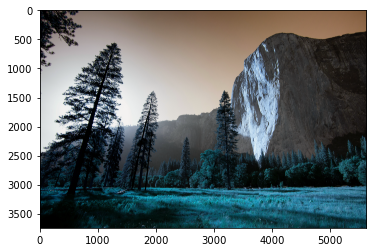

In [5]:
image_trial = cv2.imread('./images/1.jpg')
plt.imshow(image_trial);  # display the image

In [6]:
get_size(image_trial) / 1024  # displaying the size in KB 

61600.5

size: 100.2685546875KB


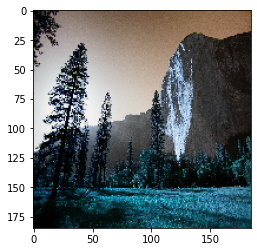

In [7]:
# the size is too much, let's compress it
image_trial_compressed = compress_image(image_trial) # compress with keeping the color
print(f"size: {get_size(image_trial_compressed)/1024}KB")
plt.imshow(image_trial_compressed);

size: 100.0KB


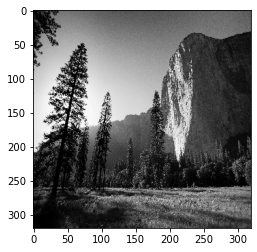

In [8]:
# the size is just over 100KB, while saving the image the size again gets compressed so it will be under 100 KB
# let's now try making it monochrome
image_trial_compressed = compress_image(image_trial, color=False) # compress with keeping the color
print(f"size: {get_size(image_trial_compressed)/1024}KB")
plt.imshow(image_trial_compressed, cmap='gray');

## This is working fine, lets batch process it


In [10]:
new_dir = './compressed_color' # the directory where the images should be stored
try:
    os.mkdir(new_dir)  # make the new dir
except:
    pass

print('Compressing')
for image in os.listdir('./images'):
    img = cv2.imread(f'./images/{image}')

    compressed_image = compress_image(img) # compress the image
    cv2.imwrite(f'{new_dir}/{image}', compressed_image)  # save the image

print('Done!')

Compressing
Done!


## This is good, but we are changing the aspect ratio, let's make a compressor funciton which will preserve the ratio.
### Approach:
$ratio = \frac{width}{height} = 1:\frac{height}{width} = 1:x$  (x =  $ \frac{height}{width}$)

let the side_dimentions be d 

$1.d * x.d = 102400$

$x.d^2 = 102400$

$d^2 = \frac{102400}{x}$

$d = \sqrt{\frac{102400}{x}}$

In [11]:
# helping function for the compressor function 
def get_dimensions(height:int, width:int, color:bool=True) -> tuple:
    """
    Takes height and width as input and scales them in a way that the new dimensions will be in the same ratio.
    @params
    height --> height of the image
    width --> width of the image
    color --> if the image should be in color or monochrome, default color (True)
    """
    ratio = height/width
    dim_squared = (102400/ratio)

    if color: dim_squared /= 3  # if the image should be color, divide the dim_squared by 3

    dim = np.sqrt(dim_squared)

    return round(dim*ratio), round(dim) # return height and width 

In [12]:
def compress_preserve_ratio(image:np.ndarray, color:bool=True, color_type:str='BGR') -> np.ndarray:
    """
    Takes image array as input and compresses it but keeping the aspect ratio
    @params
    image:ndarray --> image on which compression is to be performed
    color:bool --> if the image should be in color or monochrome, default color (True)
    color_type:str --> 'BGR' or 'RGB' 
    """
    image = image.copy()

    if get_size(image) < 102400: return image  # guard to not compressed already small image 

    if image.ndim == 3 and color:
        height, width = get_dimensions(image.shape[0], image.shape[1])
        return cv2.resize(image, dsize=(width, height)) # resize according to calculated height and width
    elif image.ndim == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY if color_type.lower().strip() == 'bgr' else cv2.COLOR_RGB2GRAY)  # convert the color
    height, width = get_dimensions(image.shape[0], image.shape[1], False)
    return cv2.resize(image, dsize=(width, height)) # return the converted image

size: 61600.5KB


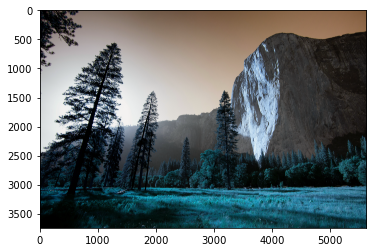

In [13]:
# testing the above functions
print(f"size: {get_size(image_trial)/1024}KB")
plt.imshow(image_trial, cmap='gray');

size: 99.978515625KB


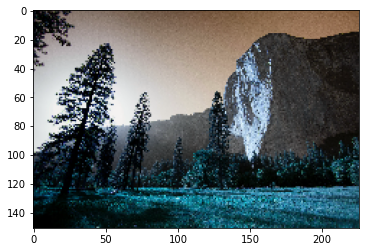

In [15]:
# let's compress using the funciton
image_trial_compressed = compress_preserve_ratio(image_trial)

print(f"size: {get_size(image_trial_compressed)/1024}KB")
plt.imshow(image_trial_compressed, cmap='gray');

### yay! 🥳 the image is now under 100KB and the ratio is also preserved
## Now let's batch process it

In [16]:
new_dir = './compressed_ratio_preserved'  # the directory whre the image is to be stored

try:
    os.mkdir(new_dir)  # make the new dir
except:
    pass

print('Compressing...')
for image in os.listdir('./images'):
    img = cv2.imread(f'./images/{image}')  # read the image

    compressed_image = compress_preserve_ratio(img)  # compress the image

    cv2.imwrite(f'{new_dir}/{image}', compressed_image)  # save the image

print('Done!')

Compressing...
Done!


# Thank You!!